In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import nltk
import seaborn as sns
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\todd\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('GrammarandProductReviews.csv')

In [3]:
df = df.fillna('')

In [4]:
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,,0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,1.00209e+08,,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,,,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,1.00209e+08,,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,,,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1.13027e+08,,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,,,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1.71268e+08,,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,,,Walker557,67981934427


In [5]:
# EXERCISE create a new DataFrame called df_best_worst 
# that only contains the 5-star and 1-star reviews

# ANSWER
df_best_worst = df[(df['reviews.rating']==5) | (df['reviews.rating']==1)]

In [6]:
df_best_worst.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,,0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,1.00209e+08,,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,,,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,1.00209e+08,,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,,,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1.13027e+08,,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,,,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1.71268e+08,,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,,,Walker557,67981934427


In [7]:
# define X and y
X = df_best_worst['reviews.text']
y = df_best_worst['reviews.rating']
print (y.value_counts())

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

5    46543
1     3701
Name: reviews.rating, dtype: int64


In [8]:
X_train.head()

31301    I was pretty skeptical about this product at f...
40514    Love this move. Great for kids and adults of a...
42102    This movie turned out to be one of the funnies...
58710    Easy to apply, absorbs well. Could feel my ski...
43635    Great movie. Fun for all ages. 3D is also done...
Name: reviews.text, dtype: object

## Part 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

In [9]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [10]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [11]:
# transforming a new sentence, what do you notice?
pd.DataFrame(vect.transform(['please call yourself a cab']).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,1,0,1,0,0


In [12]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [13]:
# rows are documents, columns are terms (phrases) (aka "tokens" or "features")
print (X_train_dtm.shape)
print (X_test_dtm.shape)
# Why do they have the same number of features

(37683, 19919)
(12561, 19919)


In [14]:
# first 50 features
print (vect.get_feature_names()[:50])

['00', '000', '0000', '000x', '007', '02', '05', '07', '09', '0layus', '0real', '10', '100', '1000', '10000000000', '1007', '100ml', '100oz', '100s', '100x', '102', '103', '104', '1040', '105', '1080', '1080p', '1099s', '10am', '10c', '10days', '10dlls', '10min', '10mo', '10mth', '10x', '10xs', '10year', '10yrs', '11', '110', '113', '11438', '1183', '11th', '11x14', '11yr', '12', '120', '1200']


In [15]:
# last 50 features
print (vect.get_feature_names()[-50:])

['ypo', 'yr', 'yrs', 'ysl', 'yu', 'yuck', 'yuckiness', 'yucko', 'yucky', 'yuk', 'yum', 'yuma', 'yumm', 'yummm', 'yummy', 'yup', 'yyears', 'zac', 'zach', 'zack', 'zany', 'zeiss', 'zero', 'zest', 'zilla', 'zinc', 'zing', 'zip', 'zipcode', 'ziploc', 'ziplock', 'zipper', 'zippers', 'zit', 'ziti', 'zits', 'zitz', 'zojirushi', 'zombie', 'zombies', 'zone', 'zones', 'zoo', 'zoom', 'zootopia', 'zre', 'zucchetta', 'zucchini', 'zyliss', 'zyrtec']


In [16]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [17]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices :: only single words
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use logistic regression with document feature matrix, NOT the text column
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)

# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class))

0.9747631557996975


In [18]:
# calculate null accuracy, which is the accuracy of our null model (just guessing the most common thing)
y_test_binary = np.where(y_test==5, 1, 0)
max(y_test_binary.mean(), 1 - y_test_binary.mean())

0.9242098559031924

In [19]:
# function does 5 things
# Has a single input, vect, that is a countvectorizer
# instantiates a logistic regression
# fit_transforms X using the vectorizer
# print the number of features (phrases)
# prints the output of a 5 fold cross validation using accuracy as our metric
def tokenize_test(vect):
    logreg = LogisticRegression()
    X_dtm = vect.fit_transform(X)
    print ('Features: ', X_dtm.shape[1])
    print ('Accuracy: ', cross_val_score(logreg, X_dtm, y, cv=5, scoring='accuracy').mean())

In [20]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  337182
Accuracy:  0.9651496242314644


## Part 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [21]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [22]:
# remove English stop words
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))
tokenize_test(vect)
# made predictions worse! Why? - we're not using stop words anymore, which are the most common

Features:  345993
Accuracy:  0.9585217900957079


In [23]:
# set of stop words
print (vect.get_stop_words())

frozenset({'fill', 'therein', 'about', 'anyone', 'please', 'its', 'sixty', 'sincere', 'due', 'de', 'afterwards', 'has', 'many', 'nobody', 'move', 'of', 'some', 'even', 'name', 'namely', 'their', 'top', 'anywhere', 'mine', 'amongst', 'empty', 'hereupon', 'any', 'least', 'very', 'something', 'eg', 'while', 'too', 'as', 'never', 'by', 'ourselves', 'the', 'thereby', 'whether', 'both', 'in', 'mill', 'or', 'because', 'above', 'after', 'four', 'hers', 'same', 'am', 'how', 'without', 'him', 'former', 'seemed', 'yours', 'beyond', 're', 'beforehand', 'do', 'wherein', 'amoungst', 'few', 'around', 'therefore', 'cry', 'front', 'between', 'next', 'although', 'can', 'everything', 'i', 'thus', 'why', 'couldnt', 'must', 'under', 'ever', 'wherever', 'another', 'be', 'beside', 'other', 'may', 'forty', 'neither', 'twelve', 'always', 'hereafter', 'but', 'becoming', 'everyone', 'ltd', 'it', 'will', 'out', 'yet', 'is', 'toward', 'himself', 'onto', 'less', 'either', 'not', 'yourselves', 'an', 'interest', 'wer

## Part 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [24]:
# remove English stop words and only keep 100 features, should be substantially FASTER
vect = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect)

Features:  100
Accuracy:  0.9362497486805259


In [25]:
# all 100 features
print (vect.get_feature_names())

['amazing', 'awesome', 'bathroom', 'best', 'better', 'bought', 'buy', 'clean', 'cleaning', 'clorox', 'clothes', 'collected', 'color', 'conditioner', 'day', 'definitely', 'detergent', 'did', 'didn', 'does', 'doesn', 'don', 'dry', 'easy', 'effects', 'enjoyed', 'face', 'family', 'favorite', 'feel', 'feels', 'formula', 'free', 'fresh', 'funny', 'good', 'got', 'great', 'hair', 'home', 'house', 'job', 'just', 'kids', 'kitchen', 'know', 'laundry', 'like', 'little', 'long', 'look', 'looking', 'lot', 'love', 'loved', 'make', 'makes', 'moisturizer', 'mop', 'movie', 'movies', 'need', 'new', 'nice', 'olay', 'old', 'original', 'perfect', 'pods', 'price', 'product', 'products', 'promotion', 'really', 'received', 'recommend', 'review', 'scent', 'shampoo', 'skin', 'smell', 'smells', 'smooth', 'soft', 'think', 'tide', 'time', 'tried', 'try', 'use', 'used', 'using', 've', 'watch', 'way', 'wipes', 'wonderful', 'work', 'works', 'years']


In [26]:
# include 1-grams and 2-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect)

Features:  100000
Accuracy:  0.9652889336539072


- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

## Part 5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [27]:
# print the first review
print (df_best_worst['reviews.text'][0])

i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.


In [28]:
# save it as a TextBlob object
review = TextBlob(df_best_worst['reviews.text'][0])

In [29]:
# list the words
review.words

WordList(['i', 'love', 'this', 'album', 'it', "'s", 'very', 'good', 'more', 'to', 'the', 'hip', 'hop', 'side', 'than', 'her', 'current', 'pop', 'sound', 'SO', 'HYPE', 'i', 'listen', 'to', 'this', 'everyday', 'at', 'the', 'gym', 'i', 'give', 'it', '5star', 'rating', 'all', 'the', 'way', 'her', 'metaphors', 'are', 'just', 'crazy'])

In [30]:
# list the sentences
review.sentences

[Sentence("i love this album."),
 Sentence("it's very good."),
 Sentence("more to the hip hop side than her current pop sound.."),
 Sentence("SO HYPE!"),
 Sentence("i listen to this everyday at the gym!"),
 Sentence("i give it 5star rating all the way."),
 Sentence("her metaphors are just crazy.")]

In [31]:
# some string methods are available
review.lower()

TextBlob("i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.")

## Part 6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [32]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print ([stemmer.stem(word) for word in review.words])

['i', 'love', 'this', 'album', 'it', "'s", 'veri', 'good', 'more', 'to', 'the', 'hip', 'hop', 'side', 'than', 'her', 'current', 'pop', 'sound', 'so', 'hype', 'i', 'listen', 'to', 'this', 'everyday', 'at', 'the', 'gym', 'i', 'give', 'it', '5star', 'rate', 'all', 'the', 'way', 'her', 'metaphor', 'are', 'just', 'crazi']


**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [33]:
word = Word('wolves')

In [34]:
stemmer.stem(word)

'wolv'

In [35]:
# assume every word is a noun
print ([word.lemmatize() for word in review.words])

['i', 'love', 'this', 'album', 'it', "'s", 'very', 'good', 'more', 'to', 'the', 'hip', 'hop', 'side', 'than', 'her', 'current', 'pop', 'sound', 'SO', 'HYPE', 'i', 'listen', 'to', 'this', 'everyday', 'at', 'the', 'gym', 'i', 'give', 'it', '5star', 'rating', 'all', 'the', 'way', 'her', 'metaphor', 'are', 'just', 'crazy']


In [36]:
# assume every word is a verb
print ([word.lemmatize(pos='v') for word in review.words])

['i', 'love', 'this', 'album', 'it', "'s", 'very', 'good', 'more', 'to', 'the', 'hip', 'hop', 'side', 'than', 'her', 'current', 'pop', 'sound', 'SO', 'HYPE', 'i', 'listen', 'to', 'this', 'everyday', 'at', 'the', 'gym', 'i', 'give', 'it', '5star', 'rat', 'all', 'the', 'way', 'her', 'metaphors', 'be', 'just', 'crazy']


In [37]:
# define a function that accepts text and returns a list of lemmas
def word_tokenize(text, how='lemma'):
    words = TextBlob(text).words
    if how == 'lemma':
        return [word.lemmatize() for word in words]
    elif how == 'stem':
        return [stemmer.stem(word) for word in words]

In [38]:
# use word_tokenize LEMMA as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=lambda x:word_tokenize(x, how='lemma'))
tokenize_test(vect)

Features:  31414
Accuracy:  0.9590791089989817


In [39]:
# use word_tokenize STEM as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=lambda x:word_tokenize(x, how='stem'))
tokenize_test(vect)

Features:  19359
Accuracy:  0.9577853805930117


## Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [40]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [41]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [42]:
# Document Frequency
vect = CountVectorizer(binary=True)
df2 = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df2.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [43]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df2

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [44]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


In [45]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(df['reviews.text'])
features = vect.get_feature_names()
dtm.shape

(71044, 26958)

In [46]:
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

Features:  22344
Accuracy:  0.9574074751348396


## Part 8: Using TF-IDF to Summarize a Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [47]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(df))
        review_text = df['reviews.text'][review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print ('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print (word)

# portion did not function correctly
            
'''    # print 5 random words
    print ('\n' + 'RANDOM WORDS:')
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print (word)
    # print the review
    print ('\n' + review_text)'''

"    # print 5 random words\n    print ('\n' + 'RANDOM WORDS:')\n    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)\n    for word in random_words:\n        print (word)\n    # print the review\n    print ('\n' + review_text)"

In [48]:
summarize()

TOP SCORING WORDS:
tide
phyical
husband
satified
wringer


## Part 9: Sentiment Analysis

In [49]:
print (review)

i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.


In [50]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review.sentiment.polarity

0.22285714285714286

In [51]:
# understanding the apply method
df['length'] = df['reviews.text'].apply(len)
df.head(1)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,length
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,,Joshua,6.02537E+11,201


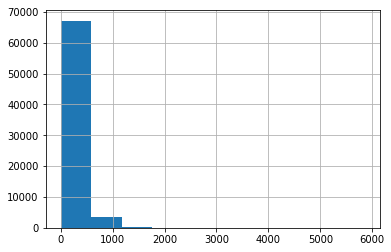

In [52]:
# Show a histogram of df review lengths
df['length'].hist()

In [53]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [54]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
df['sentiment'] = df['reviews.text'].apply(detect_sentiment)

In [55]:
# make a box plot of sentiment grouped by stars and a histogram of yelp sentiment
# You should have five boxplots in the same graph for sentiment for the first graph
# df.boxplot(column='sentiment', by='reviews.text')

# slow code

In [56]:
# df['sentiment'].hist() # Mostly positive!

# slow code

In [58]:
# Show the reviews with most positive sentiment (a score of 1)
df[df.sentiment == 1]['reviews.text'].head()

208    The best moisturizer I have used. The results ...
215    Very happy with this product and would recomme...
312    Until I found this product I was feeling hopel...
404    I have used for a couple of years and are very...
484    This product is wonderful and have recommended...
Name: reviews.text, dtype: object

In [59]:
# reviews with most negative sentiment
df[df.sentiment == -1]['reviews.text'].head()

1831    This was a boring movie i couldnt watch 20 min...
1904    Not the funniest movie ive ever seen but def n...
2622    My fiance likes these movies for some reason. ...
3700    i aways bought the xxx but can not find it so ...
5119    A must have for any Resident Evil enthusiast, ...
Name: reviews.text, dtype: object

In [93]:
# widen the column display
pd.set_option('max_colwidth', 500)

In [94]:
# Where sentiment can go wrong
# negative sentiment in a 5-star review
df[(df['reviews.rating'] == 5) & (df.sentiment < -0.3)].head(1)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,length,sentiment
897,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",2017-07-18T23:46:09Z,2018-02-05T08:34:58Z,19800001285,"019800001285,windex/12972711,windexoriginalglasscleanerrefill676oz2liter/b00192ex24,windexoriginalglasscleanerrefill676oz2liter/b000v9lapy,windexoriginalglasscleanerrefill676oz2liter/b000v9qn1a,windexoriginalglasscleanerrefill676oz2liter/001309400,windexoriginalglasscleanerrefill676oz2liter/1309400,windexoriginalglasscleanerrefill676oz2liter/03249461000p,0019800001285",Windex,12972711,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),...,5,"https://www.walmart.com/reviews/product/11027259?limit=20&sort=relevancy&page=12,https://www.walmart.com/reviews/product/11027259?limit=20&sort=relevancy&page=9,https://www.walmart.com/reviews/product/11027259?limit=20&sort=relevancy&page=7",Way too expensive!,Winded refill,,,VBrit,19800001285,18,-0.625


In [62]:
# positive sentiment in a 1-star review
df[(df['reviews.rating'] == 1) & (df.sentiment > 0.5)].head(1)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,length,sentiment
1326,AV1YtGjdglJLPUi8IOfJ,Banana Boat,"Personal Care,Makeup,Bronzer,Beauty,Skin Care,Sun & Tanning,Sun Care,Health & Beauty,Sun Protection & Tanning,Sunless Tanning Products,See more Banana Boat Summer Color Tanning lotion,Facial Self Tanners,Face",2017-07-19T02:36:44Z,2018-02-05T11:27:48Z,79656007800,"bananaboatsunlesssummercolorselftanninglotionlighttomedium/b00e5qahhq,079656007800,bananaboatsunlesssummercolorselftanninglotionlighttomedium/b001et6yl0,bananaboat/16600894,bananaboat/x10780c0,bananaboatsummercolorselftanninglotionlightmediumcolor6ozs/004603469,0079656007800,bananaboatsummercolorselftanninglotionlightmedium6oz/b001et6yl0,bananaboatsummercolorselftanninglotionlightmedium6oz/301505511828,bananaboatsummercolorselftanninglotionlightmedium6oz/b00e5qahhq,bananaboatsummercolorselft...",Energizer Personal Care,16600894,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,1,https://www.walmart.com/reviews/product/10448308?limit=20&sort=relevancy&page=2,"This is a very fast-acting lotion, I'll give it that. My problem is that after using it for about a week (like it says on the bottle), I turned a color that was more of a yellow/orange than anything else. Run away!!!!!!!",TURNS YOU ORANGE,,,jlantz,79656007800,220,0.6


In [63]:
# reset the column display width
pd.reset_option('max_colwidth')

## Bonus: Adding Features to a Document-Term Matrix

In [106]:
# create a DataFrame that only contains the 5-star and 1-star reviews
df_best_worst = df[(df['reviews.rating']==5) | (df['reviews.rating']==1)]

# define X and y
feature_cols = ['reviews.text', 'sentiment'] # cool, useful, funny were put here, Things I don't have
X = df_best_worst[feature_cols]
y = df_best_worst['reviews.rating']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [107]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train['reviews.text'])
X_test_dtm = vect.transform(X_test['reviews.text'])
print (X_train_dtm.shape)
print (X_test_dtm.shape)

(37683, 19919)
(12561, 19919)


In [108]:
# the other four feature columns that I want to use to predict stars, not just text
X_train.drop('reviews.text', axis=1).head()

,sentiment
31301,0.116026
40514,0.650000
42102,0.000000
58710,0.466667
43635,0.433333


In [109]:
# cast other feature columns to float and convert to a sparse matrix
# Why a sparse matrix, because the other matrix is sparse and the data types must match up
extra = sp.sparse.csr_matrix(X_train.drop('reviews.text', axis=1).astype(float))
extra.shape

(37683, 1)

In [110]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(37683, 19920)

In [111]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('reviews.text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(12561, 19920)

In [112]:
# use logistic regression with text column only
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9747631557996975


In [113]:
# use logistic regression with all features
logreg = LogisticRegression()
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print (metrics.accuracy_score(y_test, y_pred_class))

0.9751612132791975


## Bonus: Fun TextBlob Features

In [114]:
# spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [115]:
# spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [116]:
# definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible